# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [146]:
# Load pickled data
import pickle
import numpy as np
import cv2

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_rgb, y_train = train['features'], train['labels']
X_valid_rgb, y_valid = valid['features'], valid['labels']
X_test_rgb, y_test = test['features'], test['labels']
print('Train:', len(X_train_rgb), X_train_rgb.shape, y_train.shape)
print('Valid:', len(X_valid_rgb), X_valid_rgb.shape, y_valid.shape)
print('Test:', len(X_test_rgb),   X_test_rgb.shape,  y_test.shape)

#try with grayscale + normalization  if 
#channels = 1
#try withouth grayscaling
channels = 3
print("Using grayscaling ? =", channels==1)
if channels == 1:
    X_train = np.empty([len(X_train_rgb),32,32,1])
    X_valid = np.empty([len(X_valid_rgb),32,32,1])
    X_test = np.empty([len(X_test_rgb),32,32,1])

    for i in range(0, len(X_train_rgb)):
        X_train[i]  = np.reshape(cv2.cvtColor(X_train_rgb[i], cv2.COLOR_RGB2GRAY), (32,32,1))
    for i in range(0, len(X_valid_rgb)):
        X_valid[i]  = np.reshape(cv2.cvtColor(X_valid_rgb[i], cv2.COLOR_RGB2GRAY), (32,32,1))
    for i in range(0, len(X_test_rgb)):
        X_test[i]  = np.reshape(cv2.cvtColor(X_test_rgb[i], cv2.COLOR_RGB2GRAY), (32,32,1))

    print("After grayscaling")
    print('Train:', len(X_train), X_train.shape, y_train.shape)
    print('Valid:', len(X_valid), X_valid.shape, y_valid.shape)
    print('Test:', len(X_test),   X_test.shape,  y_test.shape)
    print('Normalizing data')
    for i in range(0, len(X_train)):
        X_train[i]  = cv2.normalize(X_train[i], X_train[i],-0.5,0.5,cv2.NORM_MINMAX)
else:
    X_train = X_train_rgb
    X_valid = X_valid_rgb
    X_test  = X_test_rgb

Train: 34799 (34799, 32, 32, 3) (34799,)
Valid: 4410 (4410, 32, 32, 3) (4410,)
Test: 12630 (12630, 32, 32, 3) (12630,)
Using grayscaling ? = False


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [147]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape #assuming all images have the same shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

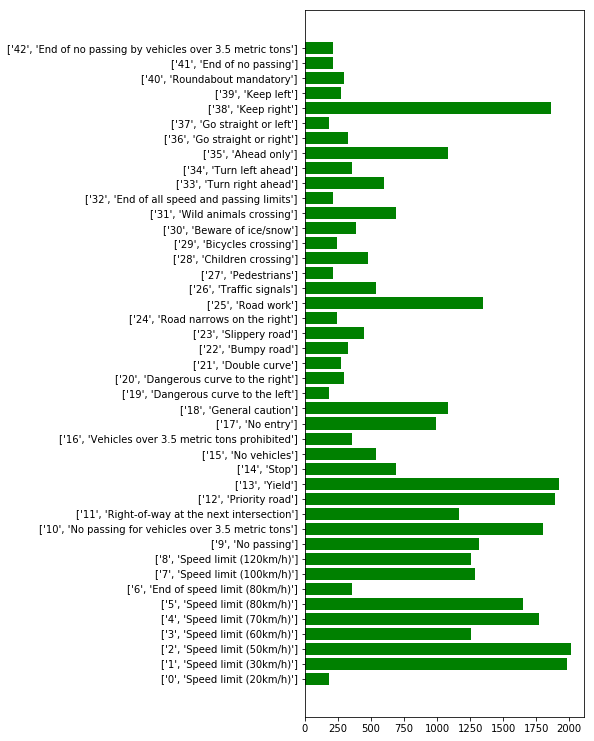

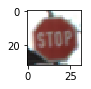

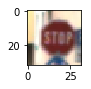

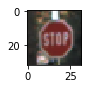

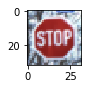

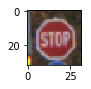

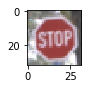

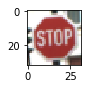

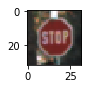

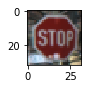

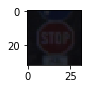

In [148]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
import random
import numpy as np
    
#read all names
snames = csv.reader(open('signnames.csv', newline=''), delimiter=',')
mylist = []
idx = 0
for rows in snames:
    if idx > 0:
        mylist.append(rows)
    idx += 1

# Visualizations will be shown in the notebook.
%matplotlib inline
d = defaultdict(int)
dClassIdx = dict((k, []) for k in y_train)
ii = 0
for sign in train['labels']:
    #count
    d[sign] += 1
    #keep list of indexes
    dClassIdx.get(sign).append(ii)
    ii += 1
    
plt.figure(figsize=(5,13))
plt.yticks(list(d.keys()), mylist)
plt.barh(list(d.keys()), list(d.values()), color='g')
plt.show()

myidxArray = dClassIdx[14]

myCount = 0
for i in myidxArray:
    idx = random.randint(0, len(myidxArray))
    plt.figure(figsize=(1,1))
    if channels == 3:
        plt.imshow(X_train_rgb[myidxArray[idx]].squeeze())
    else:
        plt.imshow(X_train_rgb[myidxArray[idx]].squeeze(), cmap='gray')
    plt.show()
    myCount += 1
    if myCount == 10:
        break
plt.show()
    

In [149]:
from scipy import ndimage
import numpy as np

def addNoise(myArray):
    oldshape = myArray.shape
    myArray = myArray.flatten()
    tenPercentCells = int(len(myArray)*0.1)
    for i in 0,tenPercentCells:
        idx = random.randint(0,len(myArray)-1)
        myArray[idx] += random.randint(-10,10)
        if myArray[idx] < 0:
            myArray[idx] = 0
        elif myArray[idx] > 255:
            myArray[idx]=255
    return myArray.reshape(oldshape)    
        
def addFake(X_train, y_train, classId, ifLessThan, increaseTo):
    if d[classId] > ifLessThan:
        print("No additions to ClassIdx", classId, ". Already has ", d[classId]," counts.")
        return X_train, y_train
    examples2Create =  int(increaseTo - d[classId])
    loopCount = int ( examples2Create/d[classId] ) + 1
    createCount = loopCount*d[classId]
    print("Additions to ClassIdx ", classId, " = ", createCount)
    
    classIdxArray = dClassIdx[classId]
    classIdxArrayLen = len(classIdxArray)
    allClassIdxImages = operator.itemgetter(classIdxArray)(X_train)
    
    #print("allClassIdxImages shape", allClassIdxImages.shape)
    
    for lc in range(0,loopCount):
        newBatch = np.copy(allClassIdxImages, order="K")
        labelArray = np.repeat(classId, len(allClassIdxImages))
        X_train = np.append(X_train, newBatch, axis=0)
        y_train = np.append(y_train, labelArray, axis=0)
    
    print("New total = ", len(X_train))
    return X_train, y_train 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Additions to ClassIdx  0  =  1440
New total =  36239
No additions to ClassIdx 1 . Already has  1980  counts.
No additions to ClassIdx 2 . Already has  2010  counts.
Additions to ClassIdx  3  =  1260
New total =  37499
No additions to ClassIdx 4 . Already has  1770  counts.
No additions to ClassIdx 5 . Already has  1650  counts.
Additions to ClassIdx  6  =  1440
New total =  38939
Additions to ClassIdx  7  =  1290
New total =  40229
Additions to ClassIdx  8  =  1260
New total =  41489
Additions to ClassIdx  9  =  1320
New total =  42809
No additions to ClassIdx 10 . Already has  1800  counts.
Additions to ClassIdx  11  =  1170
New total =  43979
No additions to ClassIdx 12 . Already has  1890  counts.
No additions to ClassIdx 13 . Already has  1920  counts.
Additions to ClassIdx  14  =  1380
New total =  45359
Additions to ClassIdx  15  =  1080
New total =  46439
Additions to ClassIdx  16  =  1440
New total =  47879
Additions to ClassIdx  17  =  990
New total =  48869
Additions to Class

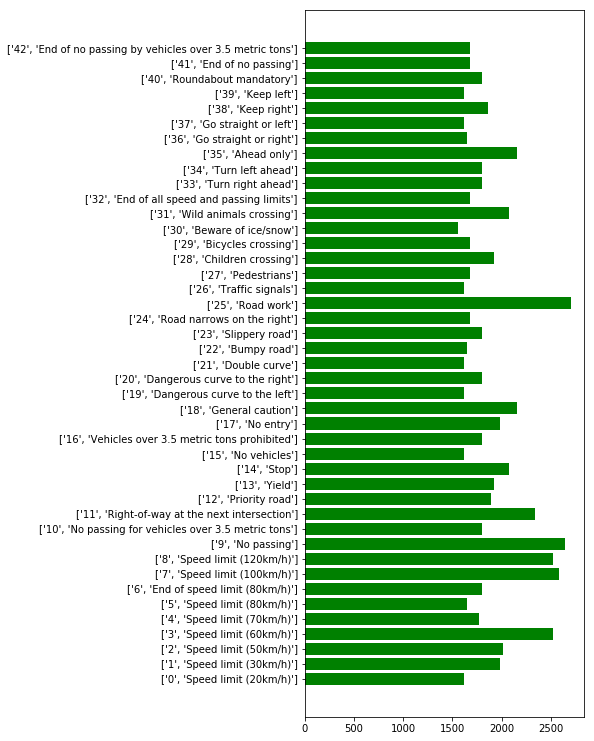

Shuffling redone
Number of training examples old = 34799  new= 81417
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [150]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import operator

for classId in range(0,43):
    X_train, y_train = addFake(X_train,y_train,classId,1500,1500) 

%matplotlib inline
d2 = defaultdict(int)
for sign2 in y_train:
    d2[sign2] += 1

plt.figure(figsize=(5,13))
plt.yticks(list(d2.keys()), mylist)
plt.barh(list(d2.keys()), list(d2.values()), color='g')
plt.show()    
    
X_train, y_train = shuffle(X_train, y_train)
print("Shuffling redone")

n_train_new = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape #assuming all images have the same shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(train['labels']))

print("Number of training examples old =", n_train, " new=", n_train_new)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#plt.imshow(X_train[34801].squeeze())
#plt.show()

### Model Architecture

In [151]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, channels, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    #adding drop out to the conv layer FURTHER reduces error by around 12 % as per 
    # this paper https://arxiv.org/ftp/arxiv/papers/1512/1512.00242.pdf
    conv1 = tf.nn.dropout(conv1, keep_prob)
    #adding drop out to the fully connected layer


    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    #adding drop out to the fully connected layer: around 13% improvement
    fc2 = tf.nn.dropout(fc2, keep_prob)
    #adding drop out to the fully connected layer
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [152]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) #keep probability

rate = 0.0008

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
#print("train=", training_operation.shape)


In [153]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
print("correct prediction=",correct_prediction)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

correct prediction= Tensor("Equal_12:0", dtype=bool)


In [154]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    goodAccuracy = 0
    print("Training...", num_examples)
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print("Shape of batch_x=", batch_x.shape)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        if validation_accuracy > 0.935:
            goodAccuracy += 1
        # stop learning when u reach your high point is still the best way to avoid overfitting
        if goodAccuracy > 5:
            break
    print("goodAccuracy=", goodAccuracy)    
    saver.save(sess, './lenet')
    print("Model saved")

Training... 81417

EPOCH 1 ...
Validation Accuracy = 0.226
EPOCH 2 ...
Validation Accuracy = 0.403
EPOCH 3 ...
Validation Accuracy = 0.503
EPOCH 4 ...
Validation Accuracy = 0.589
EPOCH 5 ...
Validation Accuracy = 0.700
EPOCH 6 ...
Validation Accuracy = 0.778
EPOCH 7 ...
Validation Accuracy = 0.808
EPOCH 8 ...
Validation Accuracy = 0.845
EPOCH 9 ...
Validation Accuracy = 0.877
EPOCH 10 ...
Validation Accuracy = 0.889
EPOCH 11 ...
Validation Accuracy = 0.910
EPOCH 12 ...
Validation Accuracy = 0.912
EPOCH 13 ...
Validation Accuracy = 0.907
EPOCH 14 ...
Validation Accuracy = 0.921
EPOCH 15 ...
Validation Accuracy = 0.929
EPOCH 16 ...
Validation Accuracy = 0.932
EPOCH 17 ...
Validation Accuracy = 0.896
EPOCH 18 ...
Validation Accuracy = 0.934
EPOCH 19 ...
Validation Accuracy = 0.936
EPOCH 20 ...
Validation Accuracy = 0.937
EPOCH 21 ...
Validation Accuracy = 0.936
EPOCH 22 ...
Validation Accuracy = 0.944
EPOCH 23 ...
Validation Accuracy = 0.934
EPOCH 24 ...
Validation Accuracy = 0.939
EPOCH 

In [155]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.932


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

webtest/class_14.png
Reading  14  has shape  (32, 32, 3)


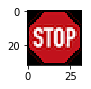

webtest/class_18.png
Reading  18  has shape  (32, 32, 3)


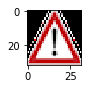

webtest/class_19.png
Reading  19  has shape  (32, 32, 3)


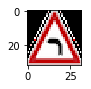

webtest/class_20.png
Reading  20  has shape  (32, 32, 3)


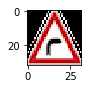

webtest/class_22.png
Reading  22  has shape  (32, 32, 3)


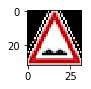

webtest/class_23.png
Reading  23  has shape  (32, 32, 3)


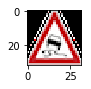

webtest/class_27.png
Reading  27  has shape  (32, 32, 3)


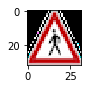

webtest/class_29.png
Reading  29  has shape  (32, 32, 3)


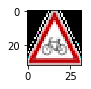

webtest/class_3.png
Reading  3  has shape  (32, 32, 3)


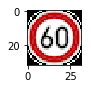

webtest/class_31.png
Reading  31  has shape  (32, 32, 3)


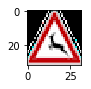

webtest/class_36.png
Reading  36  has shape  (32, 32, 3)


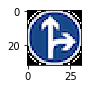

webtest/class_37.png
Reading  37  has shape  (32, 32, 3)


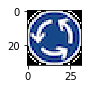

webtest/class_38.png
Reading  38  has shape  (32, 32, 3)


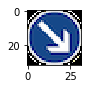

Shape of RealTest= (13, 32, 32, 3)  Labels= (13,)


In [161]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import numpy as np
import cv2
import matplotlib.pyplot as plt

imgNamelist = [14,18,19,20,22,23,27,29,3,31,36,37,38]
cnt = len(imgNamelist)
imgList = []

for i in range(0,cnt):
    print("webtest/class_"+str(imgNamelist[i])+".png")
    img = cv2.imread("webtest/class_"+str(imgNamelist[i])+".png")
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #not trying 1 channel...
    #img = np.reshape(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (32,32,1))
    #img = cv2.normalize(img, img,-0.5,0.5,cv2.NORM_MINMAX)
    imgList.append(img)
    print('Reading ' , imgNamelist[i], " has shape ", img.shape )
    plt.figure(figsize=(1,1))
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()
    
X_realTest =  np.asarray(imgList)   
y_realLabel = np.asarray(imgNamelist)
print("Shape of RealTest=", X_realTest.shape, " Labels=", y_realLabel.shape)



### Predict the Sign Type for Each Image

In [162]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

cumulativeAccuracy = 0
# Run test on real data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    for i in range(0,cnt):
        realtest_accuracy = evaluate([X_realTest[i]], [y_realLabel[i]])
        cumulativeAccuracy = ( (cumulativeAccuracy * i ) + realtest_accuracy )/(i+1)
        print("Checking ", y_realLabel[i])
        print("REAL Test Accuracy = {:.3f}".format(realtest_accuracy))
    

Checking  14
REAL Test Accuracy = 1.000
Checking  18
REAL Test Accuracy = 1.000
Checking  19
REAL Test Accuracy = 1.000
Checking  20
REAL Test Accuracy = 1.000
Checking  22
REAL Test Accuracy = 1.000
Checking  23
REAL Test Accuracy = 1.000
Checking  27
REAL Test Accuracy = 1.000
Checking  29
REAL Test Accuracy = 1.000
Checking  3
REAL Test Accuracy = 1.000
Checking  31
REAL Test Accuracy = 1.000
Checking  36
REAL Test Accuracy = 0.000
Checking  37
REAL Test Accuracy = 0.000
Checking  38
REAL Test Accuracy = 1.000
Cumulative acc= 0.846153846154


### Analyze Performance

In [163]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Cumulative acc=", cumulativeAccuracy)

Cumulative acc= 0.846153846154


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [184]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def getTop5(X_data, y_data):
    num_examples = len(X_data)
    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        top5 = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
    return top5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    
    for i in range(0,cnt):
        print("----------"," Actual CLASS = ", y_realLabel[i],"----------")
        pNc = getTop5([X_realTest[i]], [y_realLabel[i]])
        probablities = pNc[0]
        classes = pNc[1]
        
        for j in range(0,len(classes[0])):
            print(probablities[0][j], " Probablity for class ", classes[0][j])
        print("----------")

----------  Actual CLASS =  14 ----------
35.34  Probablity for class  14
9.19058  Probablity for class  26
8.56411  Probablity for class  3
6.16623  Probablity for class  10
1.94787  Probablity for class  17
----------
----------  Actual CLASS =  18 ----------
133.081  Probablity for class  18
52.014  Probablity for class  26
49.509  Probablity for class  11
-12.4265  Probablity for class  27
-51.9698  Probablity for class  12
----------
----------  Actual CLASS =  19 ----------
136.449  Probablity for class  19
45.2851  Probablity for class  21
11.8979  Probablity for class  23
4.11521  Probablity for class  31
0.792871  Probablity for class  11
----------
----------  Actual CLASS =  20 ----------
80.5601  Probablity for class  20
21.7746  Probablity for class  3
21.1946  Probablity for class  23
16.5896  Probablity for class  11
5.35281  Probablity for class  10
----------
----------  Actual CLASS =  22 ----------
70.2202  Probablity for class  22
24.1775  Probablity for class  29
3

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 